# Task lab work # 4

### The task contains 2 parts:
1. Play with [Tensorflow Playground](https://playground.tensorflow.org) and save a bunch of screenshots (at least 10).
2. Solve the classification problem on your dataset from the Lab #2: play with number of neurons, function activation and learning rate (and if you wish play with learning rate schedule)

### Datasets for classification
1. [Mushroom Classification](https://www.kaggle.com/datasets/uciml/mushroom-classification)
2. [Fetal Health Classification](https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification)
3. [Glass Classification](https://www.kaggle.com/datasets/uciml/glass)
4. [Gender Classification Dataset](https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset)
5. [Weather Type Classification](https://www.kaggle.com/datasets/nikhil7280/weather-type-classification)
6. [Star Type Classification / NASA](https://www.kaggle.com/datasets/brsdincer/star-type-classification)
7. [Happiness Classification Dataset](https://www.kaggle.com/datasets/priyanshusethi/happiness-classification-dataset)
8. [NASA: Asteroids Classification
Data Collected from NASA API](https://www.kaggle.com/datasets/shrutimehta/nasa-asteroids-classification)
9. [CS:GO Round Winner Classification](https://www.kaggle.com/datasets/christianlillelund/csgo-round-winner-classification)
10. [Heart Disease Classification Dataset](https://www.kaggle.com/datasets/bharath011/heart-disease-classification-dataset)
11. [Early Classification of Diabetes](https://www.kaggle.com/datasets/andrewmvd/early-diabetes-classification)
12. [Credit Risk Classification Dataset](https://www.kaggle.com/datasets/praveengovi/credit-risk-classification-dataset)


# Installing requirements

In [1]:
!pip install tensorflow

  Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.4-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached termcolor-3.0.1-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.17.2-cp311-cp311-win_amd64.whl.metadata (6.5 kB)
  Using cached grpcio-1.71.0-cp311-cp311-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.9.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached n


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import dependencies

In [1]:
# importing math & data processing libs
import pandas as pd
import numpy as np

# importing utils
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# importing drawing tools
import matplotlib.pyplot as plt

# importing NN wrapper lib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Load the data

In [2]:
dataset = pd.read_csv("../../lab_2/src/fisher_irises.csv")
dataset

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
x_data = dataset[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
print(f"x_data MEAN:\n{x_data.mean()}\n")
print(f"x_data STD:\n{x_data.std()}")

x_data MEAN:
sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

x_data STD:
sepal_length    0.828066
sepal_width     0.433594
petal_length    1.764420
petal_width     0.763161
dtype: float64


In [4]:
# for col_name in x_data.columns:
#     scaler = StandardScaler()
#     
#     scaler.fit([x_data[col_name].to_numpy(), ])
#     x_data[col_name] = list(scaler.transform([x_data[col_name].to_numpy(), ])[0])
#     
#     
# print(f"x_data MEAN:\n{x_data.mean()}\n")
# print(f"x_data STD:\n{x_data.std()}")

In [5]:
# Normalize the data
x_data -= x_data.mean(axis=0)
x_data /= x_data.std(axis=0)

print(f"x_data MEAN:\n{x_data.mean()}\n")`
print(f"x_data STD:\n{x_data.std()}")

x_data MEAN:
sepal_length   -5.210647e-16
sepal_width    -6.631732e-16
petal_length    1.894781e-16
petal_width    -1.894781e-16
dtype: float64

x_data STD:
sepal_length    1.0
sepal_width     1.0
petal_length    1.0
petal_width     1.0
dtype: float64


In [6]:
x_data

,sepal_length,sepal_width,petal_length,petal_width
0,-0.897674,1.028611,-1.336794,-1.308593
1,-1.139200,-0.124540,-1.336794,-1.308593
2,-1.380727,0.336720,-1.393470,-1.308593
3,-1.501490,0.106090,-1.280118,-1.308593
4,-1.018437,1.259242,-1.336794,-1.308593
...,...,...,...,...
145,1.034539,-0.124540,0.816888,1.443121
146,0.551486,-1.277692,0.703536,0.918985
147,0.793012,-0.124540,0.816888,1.050019
148,0.430722,0.797981,0.930239,1.443121


In [7]:
# Onehot encode labels
class_mapping = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
dataset["class_num"] = [class_mapping[val_] for val_ in dataset["class"]]

y = to_categorical(dataset["class_num"], 3)

In [8]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size=0.2, random_state=42)

# Train try #1
1 layer + softmax activation (which is mandatory for multiclass classification)

In [10]:
model = Sequential([
    Input(shape=(4, )),
    Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Define an initial learning rate and decay schedule
initial_lr = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=100, # Decay the learning rate every 10000 steps
    decay_rate=1 # Multiply learning rate by 0.9 every decay_steps
)

# Instantiate the optimizer with the schedule
optimizer_with_schedule = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(
    optimizer=optimizer_with_schedule,
    loss="categorical_crossentropy",
    metrics=["accuracy", "f1_score"]
)

In [13]:
stat = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=25, epochs=100)
history = stat.history

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.6744 - f1_score: 0.6178 - loss: 0.8271 - val_accuracy: 0.7000 - val_f1_score: 0.6238 - val_loss: 0.7652
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6994 - f1_score: 0.6195 - loss: 0.7618 - val_accuracy: 0.7000 - val_f1_score: 0.6238 - val_loss: 0.7045
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6567 - f1_score: 0.6017 - loss: 0.7355 - val_accuracy: 0.7000 - val_f1_score: 0.6238 - val_loss: 0.6494
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6711 - f1_score: 0.6155 - loss: 0.6983 - val_accuracy: 0.7000 - val_f1_score: 0.6238 - val_loss: 0.5995
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7161 - f1_score: 0.6775 - loss: 0.6054 - val_accuracy: 0.7000 - val_f1_score: 0.6238 - val_loss: 0.5549
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6861 - f1_score: 0.6355 - loss: 0.5856 - val_accuracy: 0.7333 - val_f1_score: 0.6825 - val_loss:

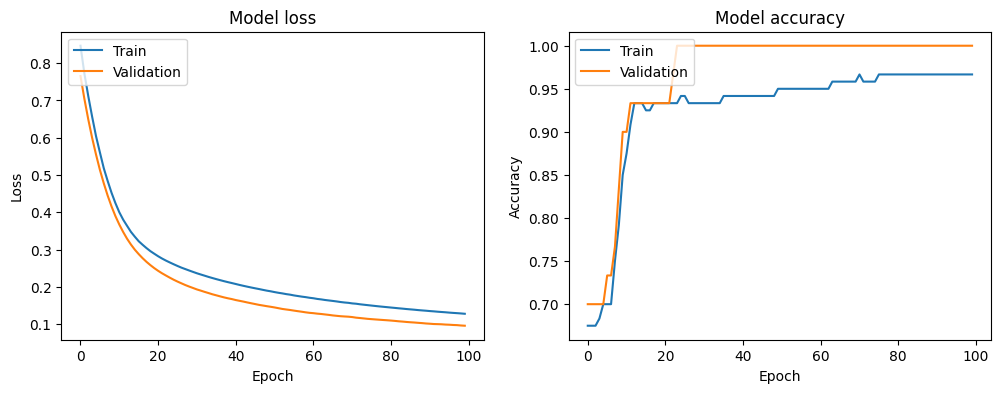

In [14]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

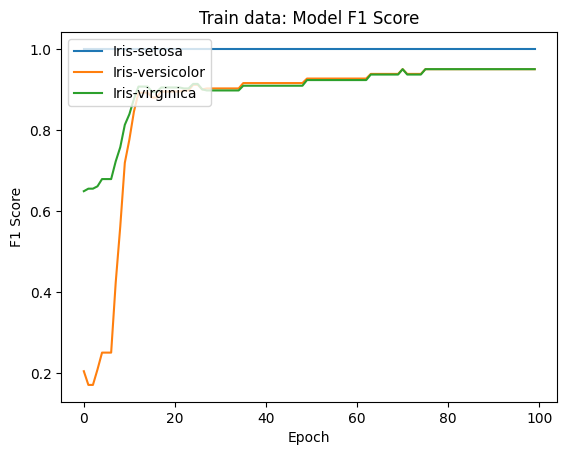

In [30]:
plt.plot([float(x[0]) for x in  history['f1_score']])
plt.plot([float(x[1]) for x in  history['f1_score']])
plt.plot([float(x[2]) for x in  history['f1_score']])
plt.title('Train data: Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(["Iris-setosa", "Iris-versicolor", "Iris-virginica"], loc='upper left')

plt.show()

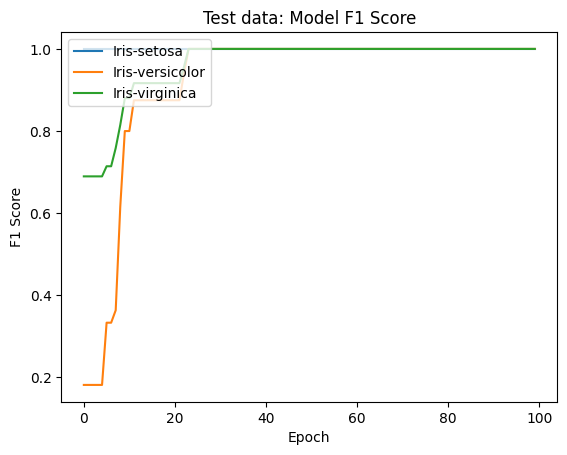

In [32]:
plt.plot([float(x[0]) for x in  history['val_f1_score']])
plt.plot([float(x[1]) for x in  history['val_f1_score']])
plt.plot([float(x[2]) for x in  history['val_f1_score']])
plt.title('Test data: Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(["Iris-setosa", "Iris-versicolor", "Iris-virginica"], loc='upper left')

plt.show()

# Try 2
lr = 0.1

In [33]:
model = Sequential([
    Input(shape=(4, )),
    Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Define an initial learning rate and decay schedule
initial_lr = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=100, # Decay the learning rate every 10000 steps
    decay_rate=1 # Multiply learning rate by 0.9 every decay_steps
)

# Instantiate the optimizer with the schedule
optimizer_with_schedule = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(
    optimizer=optimizer_with_schedule,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [36]:
stat = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=25, epochs=100)
history = stat.history

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.4839 - loss: 1.0146 - val_accuracy: 0.8667 - val_loss: 0.4661
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7750 - loss: 0.5157 - val_accuracy: 0.8333 - val_loss: 0.3408
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7706 - loss: 0.4165 - val_accuracy: 0.9333 - val_loss: 0.2576
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8761 - loss: 0.2957 - val_accuracy: 0.9333 - val_loss: 0.2108
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8772 - loss: 0.2938 - val_accuracy: 0.9667 - val_loss: 0.1845
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9183 - loss: 0.2348 - val_accuracy: 0.9667 - val_loss: 0.1646
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9283 - loss: 0.2228 - val_accuracy: 1.0000 - val_loss: 0.1599
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9606 - loss: 0.2164 - val_accuracy: 1.0000 - val_loss:

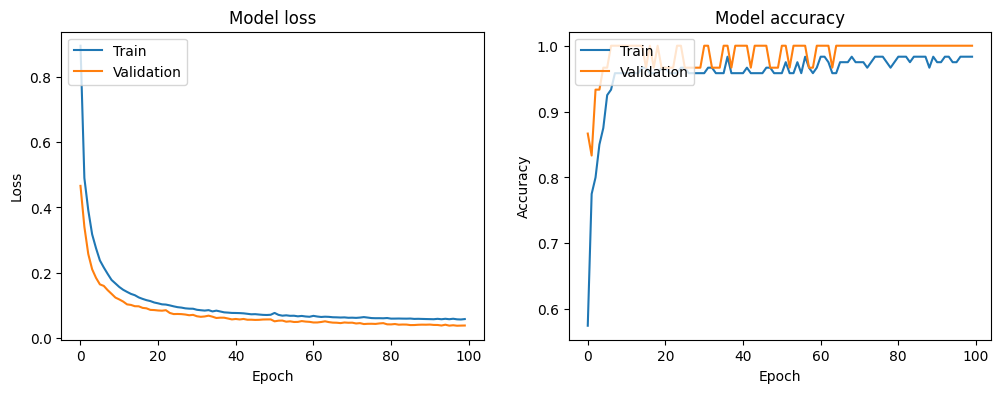

In [37]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Try 2
lr = 0.3

In [38]:
model = Sequential([
    Input(shape=(4, )),
    Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
# Define an initial learning rate and decay schedule
initial_lr = 0.3
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=100, # Decay the learning rate every 10000 steps
    decay_rate=1 # Multiply learning rate by 0.9 every decay_steps
)

# Instantiate the optimizer with the schedule
optimizer_with_schedule = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(
    optimizer=optimizer_with_schedule,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [40]:
stat = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=25, epochs=100)
history = stat.history

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.5683 - f1_score: 0.5472 - loss: 0.7932 - val_accuracy: 0.9333 - val_f1_score: 0.9306 - val_loss: 0.1953
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8906 - f1_score: 0.8902 - loss: 0.2547 - val_accuracy: 1.0000 - val_f1_score: 1.0000 - val_loss: 0.1126
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9450 - f1_score: 0.9443 - loss: 0.1370 - val_accuracy: 0.9667 - val_f1_score: 0.9659 - val_loss: 0.1194
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9511 - f1_score: 0.9516 - loss: 0.1376 - val_accuracy: 0.9667 - val_f1_score: 0.9659 - val_loss: 0.1211
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9483 - f1_score: 0.9486 - loss: 0.1135 - val_accuracy: 0.9667 - val_f1_score: 0.9659 - val_loss: 0.0774
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9711 - f1_score: 0.9717 - loss: 0.0857 - val_accuracy: 0.9667 - val_f1_score: 0.9659 - val_loss:

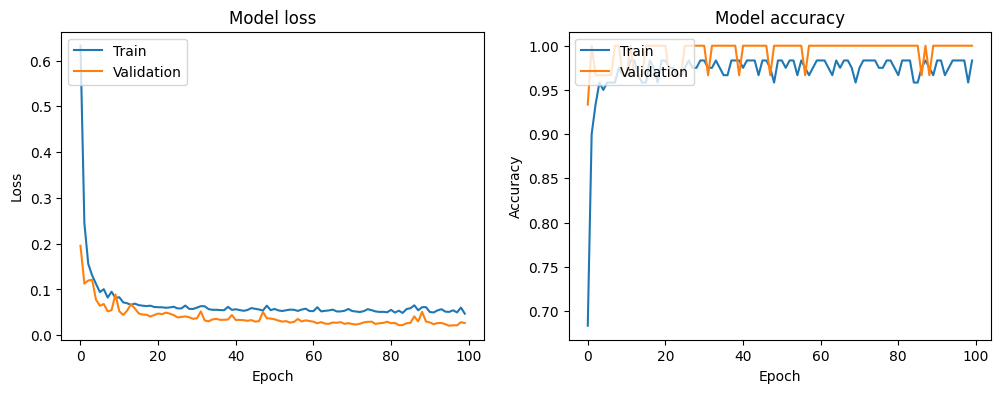

In [41]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Try 4
lr = 0.001

In [42]:
model = Sequential([
    Input(shape=(4, )),
    Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Define an initial learning rate and decay schedule
initial_lr = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=100, # Decay the learning rate every 10000 steps
    decay_rate=1 # Multiply learning rate by 0.9 every decay_steps
)

# Instantiate the optimizer with the schedule
optimizer_with_schedule = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(
    optimizer=optimizer_with_schedule,
    loss="categorical_crossentropy",
    metrics=["accuracy", ]
)

In [45]:
stat = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=25, epochs=100)
history = stat.history

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.6467 - loss: 0.7354 - val_accuracy: 0.6667 - val_loss: 0.7155
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6106 - loss: 0.8045 - val_accuracy: 0.6667 - val_loss: 0.7081
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6161 - loss: 0.7964 - val_accuracy: 0.6667 - val_loss: 0.7008
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6406 - loss: 0.7320 - val_accuracy: 0.6667 - val_loss: 0.6938
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6211 - loss: 0.7718 - val_accuracy: 0.6667 - val_loss: 0.6869
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5961 - loss: 0.7735 - val_accuracy: 0.7000 - val_loss: 0.6801
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6483 - loss: 0.7187 - val_accuracy: 0.7000 - val_loss: 0.6733
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6428 - loss: 0.7242 - val_accuracy: 0.7000 - val_loss:

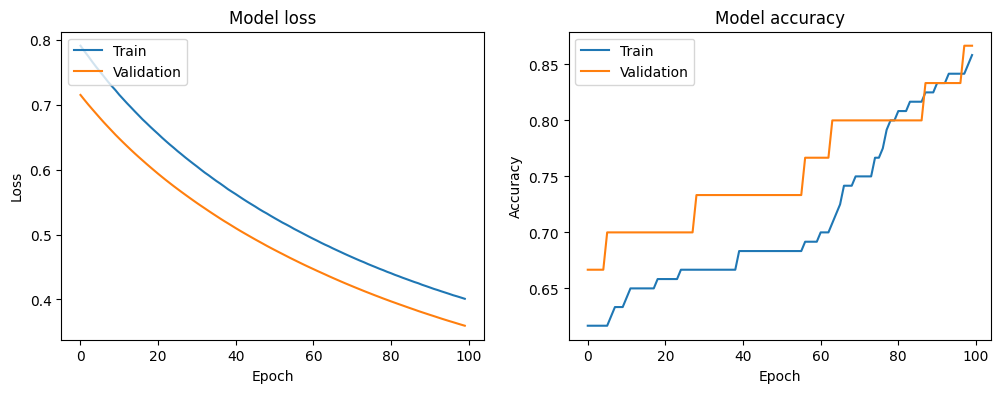

In [46]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Try 5
lr = 0.01

Layer 0: 1 relu
Layer 1: 3 softmax

In [47]:
model = Sequential([
    Input(shape=(4, )),
    Dense(1, activation='relu'),
    Dense(3, activation='softmax'),
])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1)              │             5 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11 (44.00 B)

 Trainable params: 11 (44.00 B)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Define an initial learning rate and decay schedule
initial_lr = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=100, # Decay the learning rate every 10000 steps
    decay_rate=1 # Multiply learning rate by 0.9 every decay_steps
)

# Instantiate the optimizer with the schedule
optimizer_with_schedule = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(
    optimizer=optimizer_with_schedule,
    loss="categorical_crossentropy",
    metrics=["accuracy", ]
)

In [50]:
stat = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=25, epochs=100)
history = stat.history

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.6856 - loss: 0.9205 - val_accuracy: 0.4667 - val_loss: 0.7855
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4739 - loss: 0.9087 - val_accuracy: 0.5000 - val_loss: 0.7588
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4456 - loss: 0.8341 - val_accuracy: 0.5000 - val_loss: 0.7391
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5467 - loss: 0.7997 - val_accuracy: 0.7333 - val_loss: 0.7230
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6656 - loss: 0.8216 - val_accuracy: 0.7667 - val_loss: 0.7088
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6294 - loss: 0.7989 - val_accuracy: 0.7667 - val_loss: 0.6946
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7189 - loss: 0.7362 - val_accuracy: 0.7667 - val_loss: 0.6795
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7089 - loss: 0.7337 - val_accuracy: 0.7667 - val_loss:

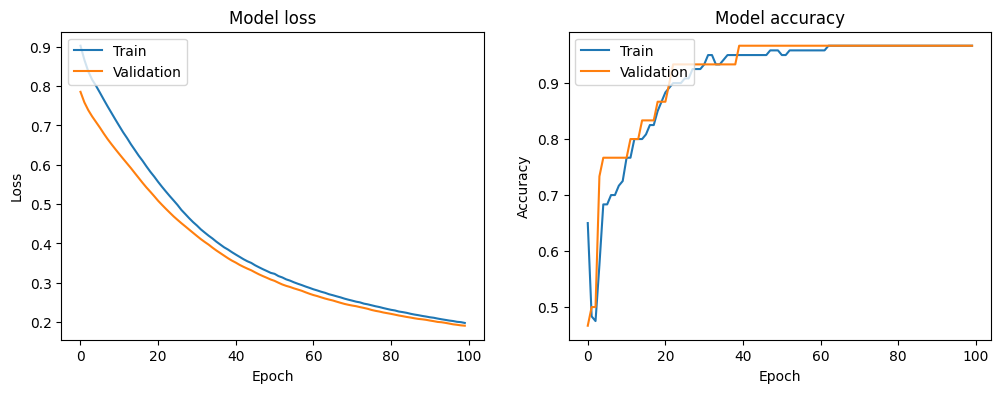

In [51]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Try 6
lr = 0.01

Layer 0: 10 relu
Layer 1: 3 softmax

In [52]:
model = Sequential([
    Input(shape=(4, )),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax'),
])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83 (332.00 B)

 Trainable params: 83 (332.00 B)

 Non-trainable params: 0 (0.00 B)

In [53]:
# Define an initial learning rate and decay schedule
initial_lr = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=100, # Decay the learning rate every 10000 steps
    decay_rate=1 # Multiply learning rate by 0.9 every decay_steps
)

# Instantiate the optimizer with the schedule
optimizer_with_schedule = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(
    optimizer=optimizer_with_schedule,
    loss="categorical_crossentropy",
    metrics=["accuracy", ]
)

In [54]:
stat = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=25, epochs=100)
history = stat.history

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.1033 - loss: 1.5076 - val_accuracy: 0.2667 - val_loss: 1.2202
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4383 - loss: 1.1450 - val_accuracy: 0.5667 - val_loss: 0.9458
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6289 - loss: 0.8856 - val_accuracy: 0.8333 - val_loss: 0.7510
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7800 - loss: 0.7301 - val_accuracy: 0.8333 - val_loss: 0.6161
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7522 - loss: 0.6475 - val_accuracy: 0.8333 - val_loss: 0.5241
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8072 - loss: 0.5291 - val_accuracy: 0.8667 - val_loss: 0.4593
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8100 - loss: 0.5115 - val_accuracy: 0.8667 - val_loss: 0.4091
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8378 - loss: 0.4282 - val_accuracy: 0.9000 - val_loss:

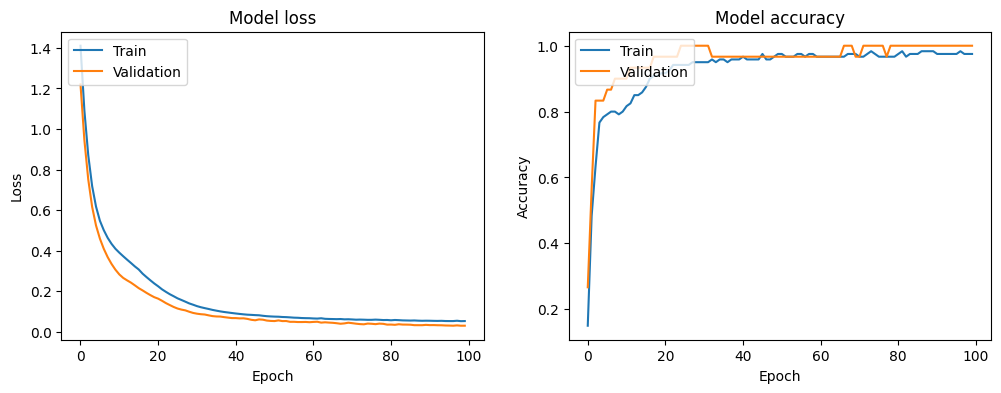

In [55]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Try 7
lr = 0.01

* Layer 0: 100 relu
* Layer 1: 100 relu
* Layer 2: 100 relu
* Layer 3: 100 relu
* Layer 4: 3 softmax

In [56]:
model = Sequential([
    Input(shape=(4, )),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(3, activation='softmax'),
])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 100)            │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,103 (121.50 KB)

 Trainable params: 31,103 (121.50 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
# Define an initial learning rate and decay schedule
initial_lr = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=100, # Decay the learning rate every 10000 steps
    decay_rate=1 # Multiply learning rate by 0.9 every decay_steps
)

# Instantiate the optimizer with the schedule
optimizer_with_schedule = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(
    optimizer=optimizer_with_schedule,
    loss="categorical_crossentropy",
    metrics=["accuracy", ]
)

In [58]:
stat = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=25, epochs=100)
history = stat.history

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.5144 - loss: 0.8615 - val_accuracy: 0.8667 - val_loss: 0.2609
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8039 - loss: 0.3205 - val_accuracy: 1.0000 - val_loss: 0.1771
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9583 - loss: 0.2590 - val_accuracy: 0.8667 - val_loss: 0.2461
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8694 - loss: 0.2288 - val_accuracy: 0.9667 - val_loss: 0.1390
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8933 - loss: 0.1878 - val_accuracy: 1.0000 - val_loss: 0.0685
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9728 - loss: 0.1041 - val_accuracy: 1.0000 - val_loss: 0.0361
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9717 - loss: 0.0748 - val_accuracy: 1.0000 - val_loss: 0.0463
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9678 - loss: 0.0948 - val_accuracy: 0.9667 - val_loss:

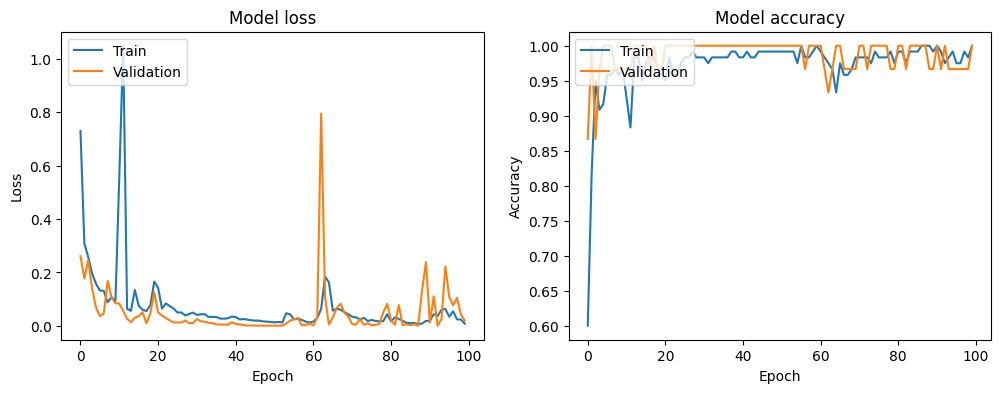

In [59]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# # Try 8
lr = 0.01

Layer 0: 10 sigmoid
Layer 1: 3 softmax

In [60]:
model = Sequential([
    Input(shape=(4, )),
    Dense(10, activation='sigmoid'),
    Dense(3, activation='softmax'),
])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83 (332.00 B)

 Trainable params: 83 (332.00 B)

 Non-trainable params: 0 (0.00 B)

In [61]:
# Define an initial learning rate and decay schedule
initial_lr = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=100, # Decay the learning rate every 10000 steps
    decay_rate=1 # Multiply learning rate by 0.9 every decay_steps
)

# Instantiate the optimizer with the schedule
optimizer_with_schedule = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(
    optimizer=optimizer_with_schedule,
    loss="categorical_crossentropy",
    metrics=["accuracy", ]
)

In [62]:
stat = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=25, epochs=100)
history = stat.history

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.3344 - loss: 1.1397 - val_accuracy: 0.3667 - val_loss: 0.9992
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3400 - loss: 1.0176 - val_accuracy: 0.7667 - val_loss: 0.9149
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7617 - loss: 0.9148 - val_accuracy: 0.7667 - val_loss: 0.8495
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7322 - loss: 0.8576 - val_accuracy: 0.7667 - val_loss: 0.7822
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8011 - loss: 0.7733 - val_accuracy: 0.8333 - val_loss: 0.7129
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7806 - loss: 0.7195 - val_accuracy: 0.9000 - val_loss: 0.6467
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8144 - loss: 0.6503 - val_accuracy: 0.9333 - val_loss: 0.5892
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7894 - loss: 0.6101 - val_accuracy: 0.9000 - val_loss:

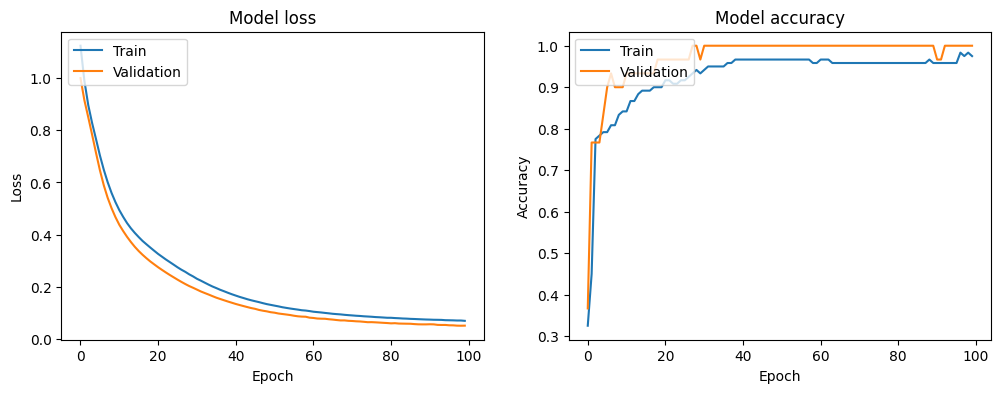

In [63]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Try 9
lr = 0.01

Layer 0: 10 tanh
Layer 1: 3 softmax

In [64]:
model = Sequential([
    Input(shape=(4, )),
    Dense(1, activation='tanh'),
    Dense(3, activation='softmax'),
])

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 1)              │             5 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 3)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11 (44.00 B)

 Trainable params: 11 (44.00 B)

 Non-trainable params: 0 (0.00 B)

In [65]:
# Define an initial learning rate and decay schedule
initial_lr = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=100, # Decay the learning rate every 10000 steps
    decay_rate=1 # Multiply learning rate by 0.9 every decay_steps
)

# Instantiate the optimizer with the schedule
optimizer_with_schedule = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(
    optimizer=optimizer_with_schedule,
    loss="categorical_crossentropy",
    metrics=["accuracy", ]
)

In [66]:
stat = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=25, epochs=100)
history = stat.history

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.4122 - loss: 1.0513 - val_accuracy: 0.5000 - val_loss: 1.0379
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4878 - loss: 1.0262 - val_accuracy: 0.5000 - val_loss: 1.0179
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4728 - loss: 1.0096 - val_accuracy: 0.5000 - val_loss: 0.9977
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4694 - loss: 1.0090 - val_accuracy: 0.5000 - val_loss: 0.9743
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4878 - loss: 1.0060 - val_accuracy: 0.5333 - val_loss: 0.9486
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4861 - loss: 0.9728 - val_accuracy: 0.5667 - val_loss: 0.9217
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5128 - loss: 0.9600 - val_accuracy: 0.5000 - val_loss: 0.8914
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5078 - loss: 0.9248 - val_accuracy: 0.5333 - val_loss:

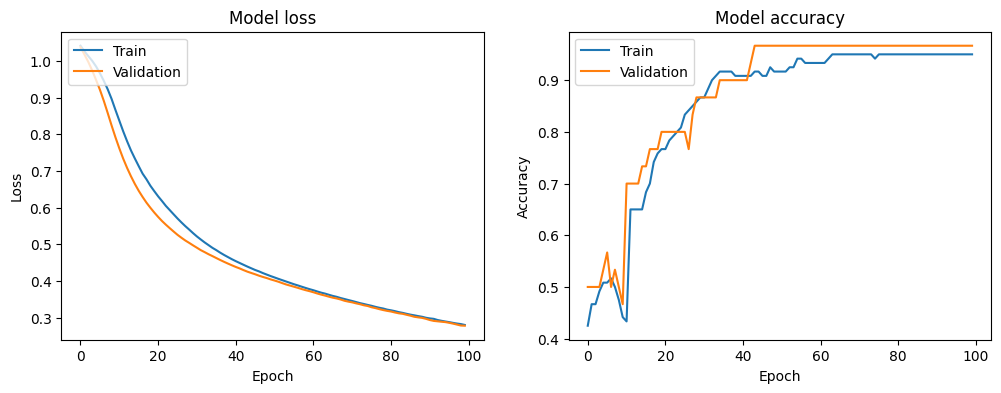

In [67]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()